In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
from s4_playground.plotting.data.exp3.speed_test_annotated import data

In [3]:
data

{'s6_fused': {'mem_far': 0.51, 'mem_back': 2.14, 'far': 72.6, 'back': 18.8},
 's6': {'mem_far': 0.55, 'mem_back': 2.9, 'far': 70.3, 'back': 17.1},
 's6_bi': {'mem_far': 0.76, 'mem_back': 4.5, 'far': 42.0, 'back': 10.9},
 's4d': {'mem_far': 0.92, 'mem_back': 5.0, 'far': 63.9, 'back': 14.9},
 's4d_bi': {'mem_far': 0.97, 'mem_back': 5.81, 'far': 43.0, 'back': 10.0}}

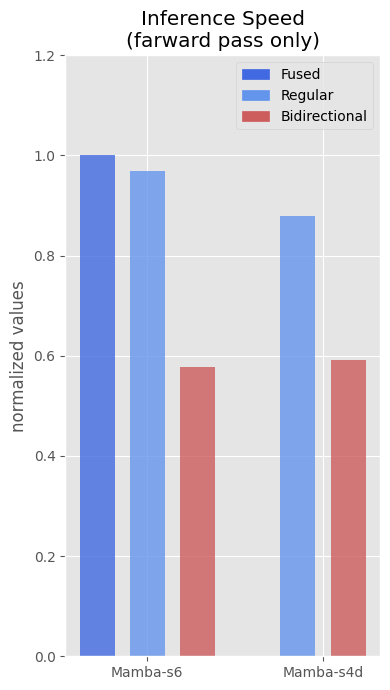

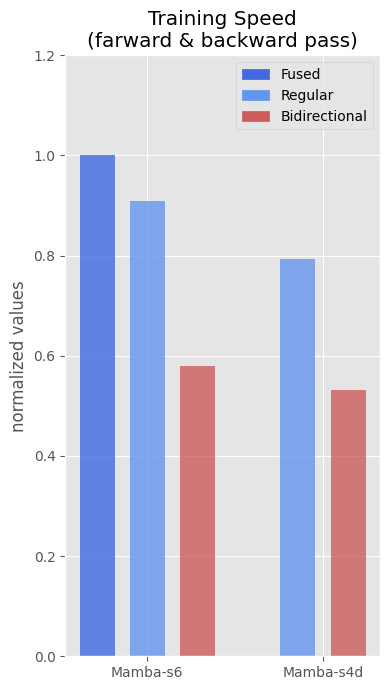

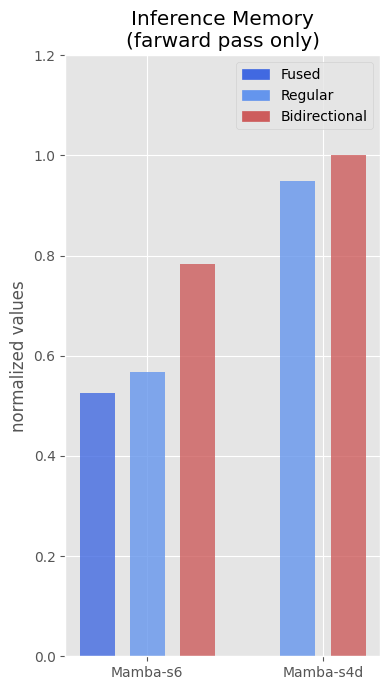

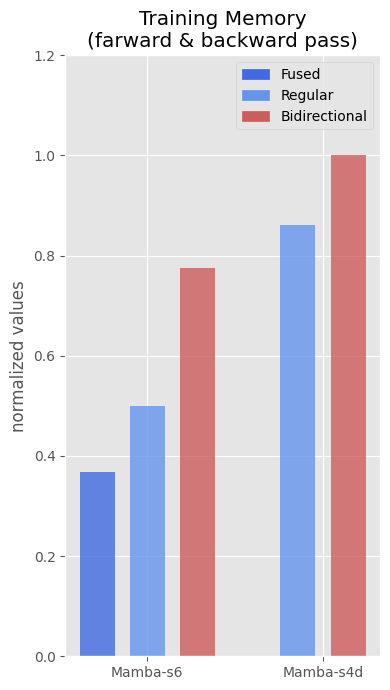

In [7]:
import numpy as np

vars = ["far", "back", "mem_far", "mem_back"]
def plot_efficiency(var = "back"):
    names = [key for key in data.keys()]
    vals = np.array([data[key][var] for key in data.keys()])
    vals = vals / vals.max()
    # max_val = max([data[key][var] for key in data.keys()])
    # print(max_val)
    # max_val = {key[var] : [data[key][var]/max_val for key in data.keys()}
    plt.figure(figsize=(4,7))
    idx = 0
    for name, val in zip(names, vals):
        if idx == 3: idx+=1
        if "fused" in name:
            color="royalblue"

        elif "bi" in name:
            color="indianred"
        else:
            color="cornflowerblue"
           
           
        plt.bar(idx, val, color=color, width=0.7, alpha=0.8)
        idx+=1
        
    import matplotlib.patches as mpatches
    
    red_patch = [
                 mpatches.Patch(color='royalblue', label='Fused'),
                 mpatches.Patch(color='cornflowerblue', label='Regular'),
                 mpatches.Patch(color='indianred', label='Bidirectional'),
                 ]
    plt.legend(handles=red_patch, ncol=1)
    
    if var == "far":
        title = "Inference Speed\n(farward pass only)"
       
    elif var == "back":
        title = "Training Speed\n(farward & backward pass)"
       
    elif var == "mem_far":
        title = "Inference Memory\n(farward pass only)"   
       
    elif var in "mem_back":
        title = "Training Memory\n(farward & backward pass)"
    else:
        raise NameError
   
    plt.title(title)
    plt.xticks([1, 4.5], ["Mamba-s6", "Mamba-s4d"])
    plt.ylabel("normalized values")
    plt.tight_layout()
    title = title.replace(" ","")
    plt.ylim(0,1.2)
    plt.savefig(f"data/exp3/{title}_bi_speed.png", dpi=200)
    plt.show()


for var in vars:
    plot_efficiency(var)